# Group_No:32
# Aditya kumar(T21051)
# Fiza Parveen(S20009)

In [1]:
import pandas as pd
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import numpy as np

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
import random
def set_seed(seed = 1234):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 10)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
File="/content/drive/My Drive/DL_ASS4_Group32/Handwriting_Data"

In [5]:
def readData(Folder,file):
    data=pd.read_csv(Folder+"/"+str(file)+".txt"," ",header=None)
    data=np.array(data.values)
    return data

In [6]:
def loadData(image_path,train_test):
    char = []
    y =[]
    
    for filename in os.listdir(image_path):
        if filename[0] != '.':
            subfolder_chr = image_path+filename+train_test
            for subfile in os.listdir(subfolder_chr):
                ch = pd.read_csv(subfolder_chr+str(subfile)," ",header=None)
                A = ch.values[0]
                A = A.astype(np.float32)
                B = A[1:-1].reshape((-1,2))
                min_x = np.min(B,axis=0)
                max_x = np.max(B,axis=0)
                B = (B-min_x)/(max_x - min_x)
                
                char.append(B)
                y.append(filename)

    label=[]
    for z in y:
        if z=='a':
            label.append([1,0,0,0,0])
        if z=='bA':
            label.append([0,1,0,0,0])
        if z=='chA':
            label.append([0,0,1,0,0])
        if z=='dA':
            # print('dA')
            label.append([0,0,0,1,0])
        if z=='tA':
            # print('tA')
            label.append([0,0,0,0,1])
        
            
    charater, label = char, np.array(label).astype(np.float32)

    return charater, label

In [7]:
path = "/content/drive/My Drive/DL_ASS4_Group32/Handwriting_Data/"

In [8]:
train, label = loadData(path,'/train/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  """Entry point for launching an IPython kernel.


In [95]:
print(len(train))

344


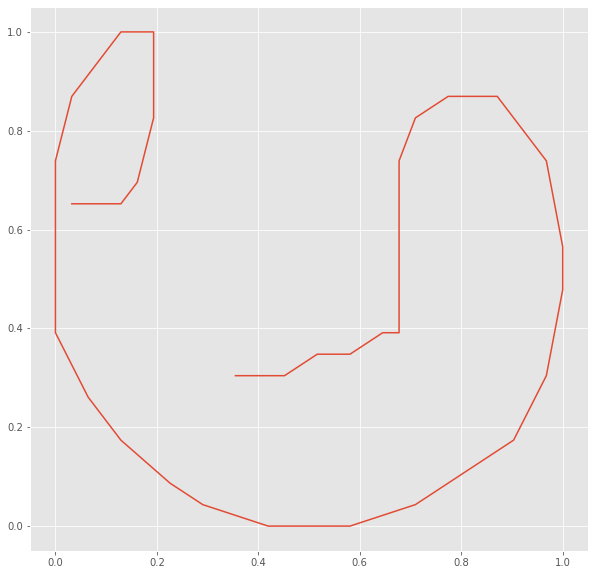

In [52]:
plt.plot(train[10][:,0],train[10][:,1])

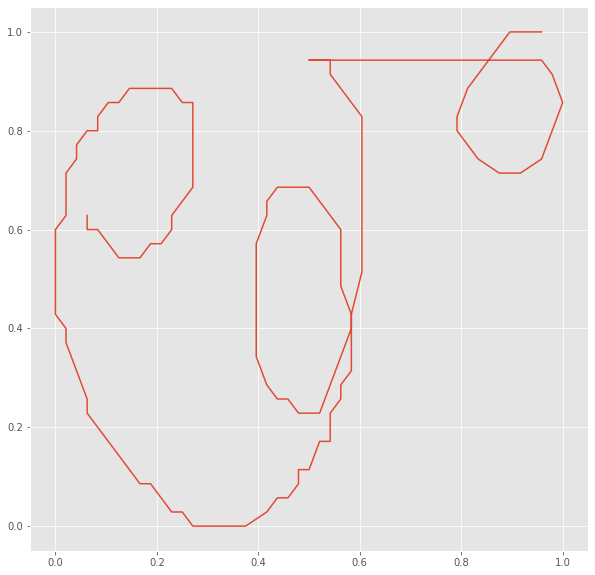

In [96]:
plt.plot(train[110][:,0],train[110][:,1])

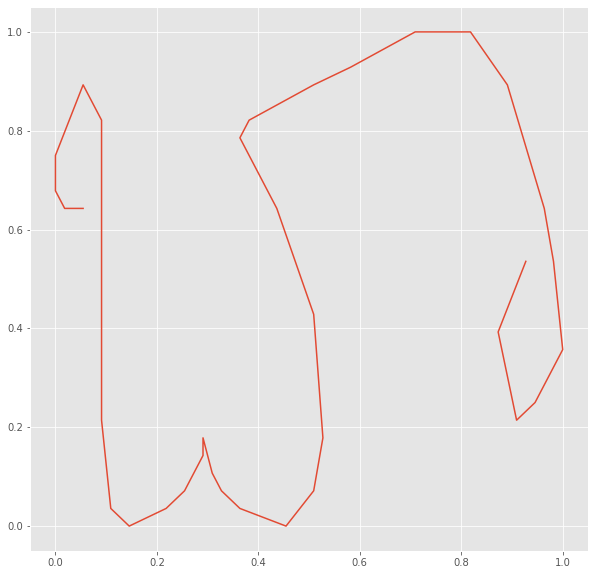

In [97]:
plt.plot(train[200][:,0],train[200][:,1])

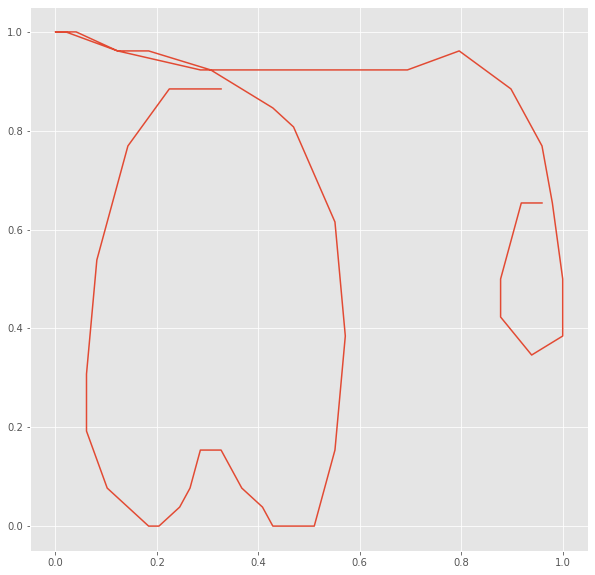

In [100]:
plt.plot(train[270][:,0],train[270][:,1])

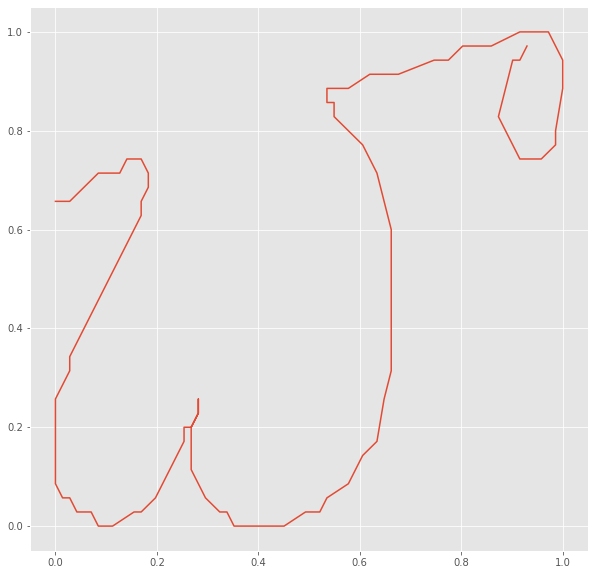

In [101]:
plt.plot(train[330][:,0],train[330][:,1])

In [71]:

class LSTM_Char(nn.Module):
    def __init__(self, input_size, hidden_size, layer_size, output_size):
        super(LSTM_Char, self).__init__()
        
        self.input_size, self.hidden_size, self.layer_size, self.output_size = input_size, hidden_size, layer_size, output_size
        
        
        # Step1: the LSTM model
        self.LSTM = nn.LSTM(input_size, hidden_size)
        
     
        self.layer = nn.Linear(hidden_size, output_size)
        self.soft = nn.Softmax(dim=0)
            
            
    def forward(self, images, prints=False):
        if prints: print('images shape:', images.shape)
        
        
          
        # LSTM:
        output, _ = self.LSTM(images)
        if prints: print('LSTM: output shape:', output.shape, '\n')
        
        # FNN:
        output = self.layer(output[-1])
        output =self.soft(output)
        if prints: print('FNN: Final output shape:', output.shape)
        
        return output

In [88]:

input_size = 2      
hidden_size = 12   # number of hidden neurons
layer_size = 1        # number of layers
output_size = 5      # possible choices

In [66]:


# Instantiate the model
# We'll use TANH as our activation function
#rnn_rnn = LSTM_Char(input_size, hidden_size, layer_size, output_size)


In [13]:
input = torch.from_numpy(train[10])
output=rnn_rnn(input)


In [14]:
output

tensor([0.2733, 0.1816, 0.1633, 0.1879, 0.1940], grad_fn=<SoftmaxBackward0>)

In [15]:
print(len(train))
print(label.shape)

344
(344, 5)


In [87]:
def LSTM_accuracy_confusion_matrix():
      train_loss=0

      confusion_matrix = np.zeros((5,5))
      # print(confusion_matrix)
      epoch =10
      for i in range(len(label)-1):

        A = train[i]
        A = A.astype(np.float32)
        input =torch.from_numpy(A)
        l = label[i]
        l = l.astype(np.float32)
        l=np.argmax(l)
        lbl  =torch.tensor(l)
        optimizer.zero_grad()
        output=rnn_rnn(input)
        pre = torch.argmax(output).item()
        act = lbl.item()
        
        if pre == act :
          confusion_matrix[act][act]+=1
        else:
          confusion_matrix[act][pre]+=1

      Acc = confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2]+confusion_matrix[3][3]+confusion_matrix[4][4]
      Total = np.sum(confusion_matrix)
      Acc = 100* Acc/Total
      print('Accuracy: ',Acc)
      print(confusion_matrix)


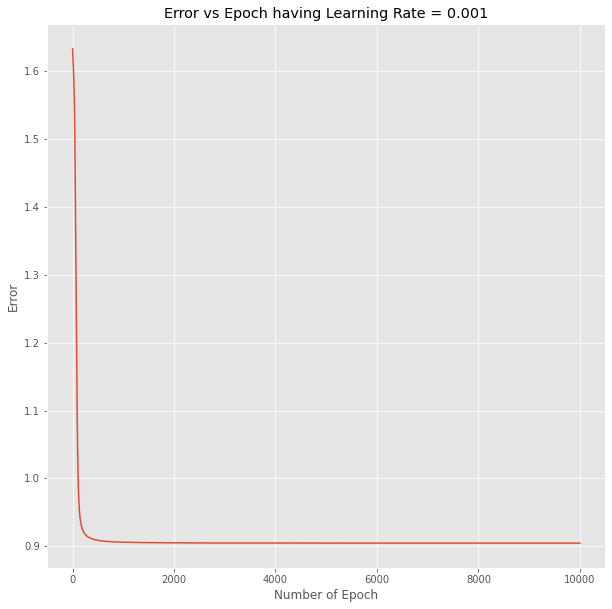

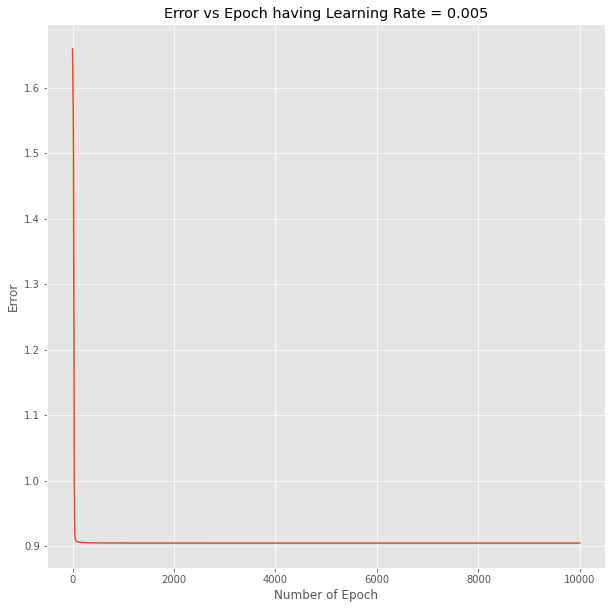

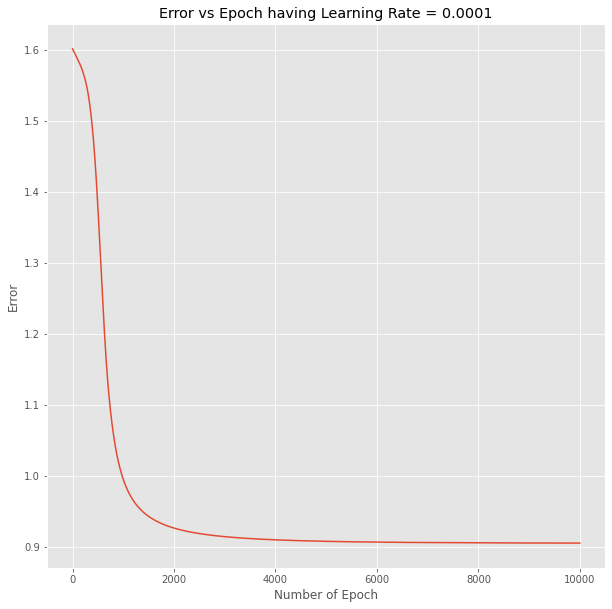

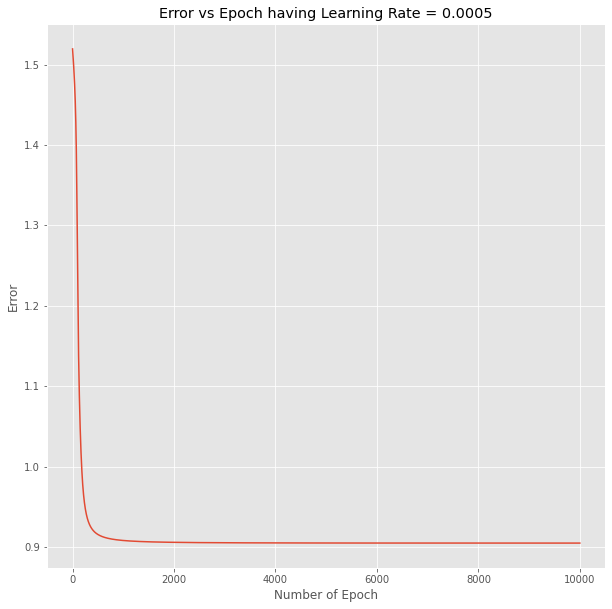

In [73]:
criterion = nn.CrossEntropyLoss()
learning_rates = [ 0.001, 0.005, 0.0001,0.0005]

for pos in range(len(learning_rates)):
  rnn_rnn = LSTM_Char(input_size, hidden_size, layer_size, output_size)
  optimizer = optim.Adam(rnn_rnn.parameters(), lr=learning_rates[pos])
  losss =[]
  epoch = 10000
  preloss=0
  
  for j in range(epoch):
    train_loss=0
    for i in range(len(train)):

      A = train[i]
      A = A.astype(np.float32)
      input =torch.from_numpy(A)
      l = label[i]
      l = l.astype(np.float32)
      l=np.argmax(l)
      lbl  =torch.tensor(l)
      optimizer.zero_grad()
      output=rnn_rnn(input)
      
      # print(output)
      # print(lbl)

      loss = criterion(input=output, target =lbl)
      loss.backward()
      # Updates the weights
      optimizer.step()
      
      # Save Loss & Accuracy after each iteration
      train_loss += loss.item()
      losss.append(train_loss)
      preloss = train_loss

      if abs(preloss-train_loss)<=10e-4:
        break
      
    # Print Average Train Loss & Accuracy after each epoch
    # print('TRAIN | Epoch: {}/{} | Loss: {:.2f} |'.format(j+1, epoch, train_loss))

  plt.plot(losss)
  plt.xlabel("Number of Epoch")
  plt.ylabel("Error")
  plt.title("Error vs Epoch having Learning Rate = {}".format(learning_rates[pos]))
  plt.show()
  #LSTM_accuracy_confusion_matrix()

 

In [63]:
'''
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn_rnn.parameters(), lr=0.0001)
losss =[]
epoch =100
preloss=0
for j in range(epoch):
  train_loss=0
  for i in range(len(label)-1):

    A = train[i]
    A = A.astype(np.float32)
    input =torch.from_numpy(A)
    l = label[i]
    l = l.astype(np.float32)
    l=np.argmax(l)
    lbl  =torch.tensor(l)
    optimizer.zero_grad()
    output=rnn_rnn(input)
    
    # print(output)
    # print(lbl)

    loss = criterion(input=output, target =lbl)
    loss.backward()
    # Updates the weights
    optimizer.step()
    
    # Save Loss & Accuracy after each iteration
    train_loss += loss.item()
    losss.append(train_loss)
    

  # Print Average Train Loss & Accuracy after each epoch
  print('TRAIN | Epoch: {}/{} | Loss: {:.2f} |'.format(j+1, epoch, train_loss))
  
  if abs(preloss-train_loss)<=10e-4:
    break
  
  preloss = train_loss

#plt.plot(losss)
'''


"\ncriterion = nn.CrossEntropyLoss()\noptimizer = optim.Adam(rnn_rnn.parameters(), lr=0.0001)\nlosss =[]\nepoch =100\npreloss=0\nfor j in range(epoch):\n  train_loss=0\n  for i in range(len(label)-1):\n\n    A = train[i]\n    A = A.astype(np.float32)\n    input =torch.from_numpy(A)\n    l = label[i]\n    l = l.astype(np.float32)\n    l=np.argmax(l)\n    lbl  =torch.tensor(l)\n    optimizer.zero_grad()\n    output=rnn_rnn(input)\n    \n    # print(output)\n    # print(lbl)\n\n    loss = criterion(input=output, target =lbl)\n    loss.backward()\n    # Updates the weights\n    optimizer.step()\n    \n    # Save Loss & Accuracy after each iteration\n    train_loss += loss.item()\n    losss.append(train_loss)\n    \n\n  # Print Average Train Loss & Accuracy after each epoch\n  print('TRAIN | Epoch: {}/{} | Loss: {:.2f} |'.format(j+1, epoch, train_loss))\n  \n  if abs(preloss-train_loss)<=10e-4:\n    break\n  \n  preloss = train_loss\n\n#plt.plot(losss)\n"

In [17]:
train_loss=0

confusion_matrix = np.zeros((5,5))
# print(confusion_matrix)
epoch =10
for i in range(len(label)-1):

  A = train[i]
  A = A.astype(np.float32)
  input =torch.from_numpy(A)
  l = label[i]
  l = l.astype(np.float32)
  l=np.argmax(l)
  lbl  =torch.tensor(l)
  optimizer.zero_grad()
  output=rnn_rnn(input)
  pre = torch.argmax(output).item()
  act = lbl.item()
  
  if pre == act :
    confusion_matrix[act][act]+=1
  else:
    confusion_matrix[act][pre]+=1

Acc = confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2]+confusion_matrix[3][3]+confusion_matrix[4][4]
Total = np.sum(confusion_matrix)
Acc = 100* Acc/Total
print('Accuracy: ',Acc)
print(confusion_matrix)



Accuracy:  55.393586005830905
[[69.  0.  0.  0.  0.]
 [ 0.  0. 49. 18.  0.]
 [ 0.  0. 62.  7.  0.]
 [ 0.  0. 10. 59.  0.]
 [ 0.  0. 41. 28.  0.]]


# TEST


In [84]:
test, label = loadData(path,'/dev/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  """Entry point for launching an IPython kernel.


In [29]:
print(test)

[array([[0.09615503, 0.64516455],
       [0.09615503, 0.61290413],
       [0.09615503, 0.5806486 ],
       [0.11538719, 0.5483882 ],
       [0.15384866, 0.51613265],
       [0.19231007, 0.51613265],
       [0.23077145, 0.51613265],
       [0.26923293, 0.51613265],
       [0.30769432, 0.5483882 ],
       [0.365385  , 0.64516455],
       [0.38461718, 0.7096806 ],
       [0.38461718, 0.7741965 ],
       [0.38461718, 0.8387124 ],
       [0.38461718, 0.90322846],
       [0.365385  , 0.93548393],
       [0.3461558 , 0.96774435],
       [0.30769432, 1.        ],
       [0.21153928, 1.        ],
       [0.1730779 , 1.        ],
       [0.15384866, 1.        ],
       [0.11538719, 0.93548393],
       [0.07692581, 0.90322846],
       [0.01923217, 0.7741965 ],
       [0.        , 0.6774202 ],
       [0.        , 0.61290413],
       [0.        , 0.51613265],
       [0.01923217, 0.32258472],
       [0.07692581, 0.25806874],
       [0.13461651, 0.16129237],
       [0.21153928, 0.0967764 ],
       [0

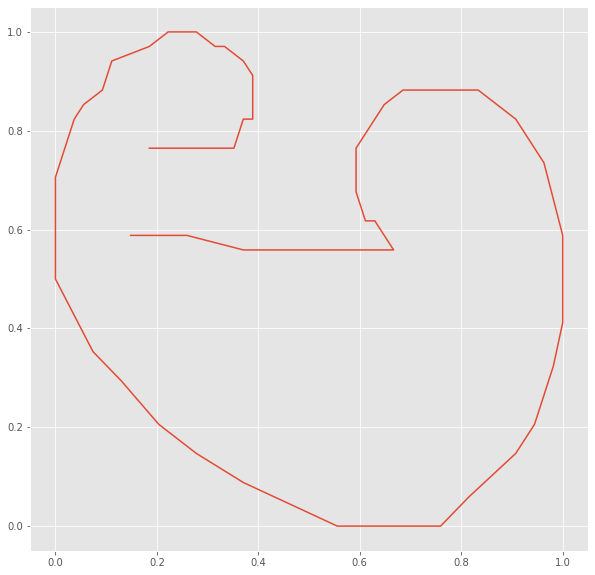

In [40]:
plt.plot(test[10][:,0],test[10][:,1])

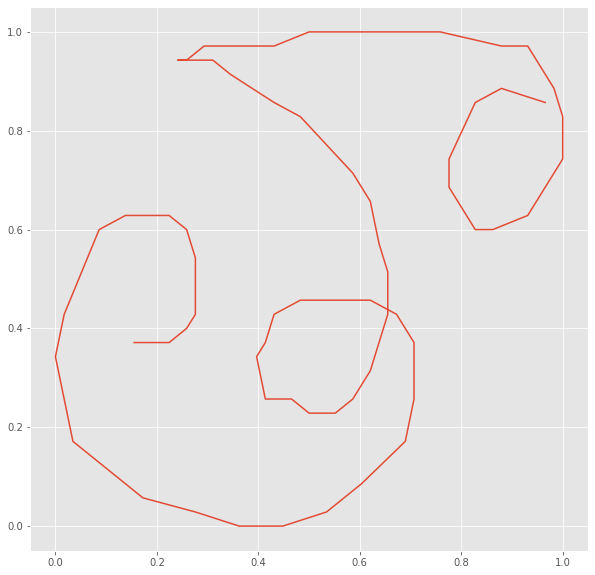

In [42]:
plt.plot(test[20][:,0],test[20][:,1])

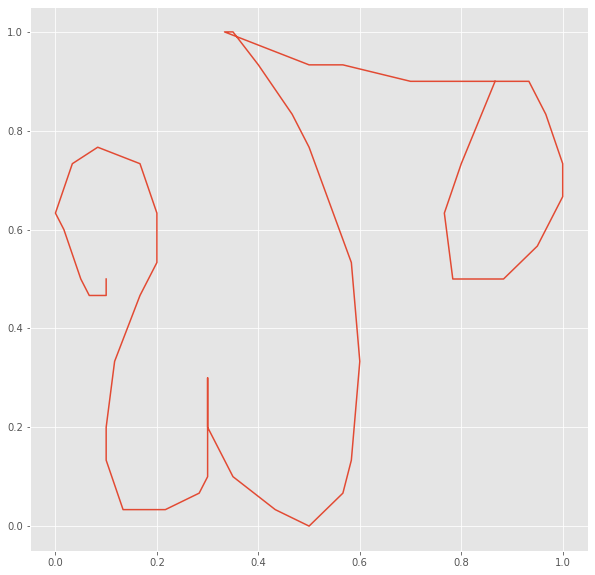

In [44]:
plt.plot(test[40][:,0],test[40][:,1])

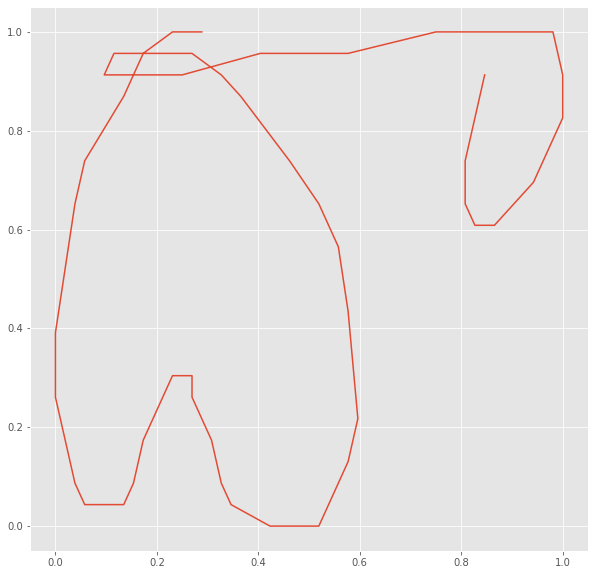

In [46]:
plt.plot(test[60][:,0],test[60][:,1])

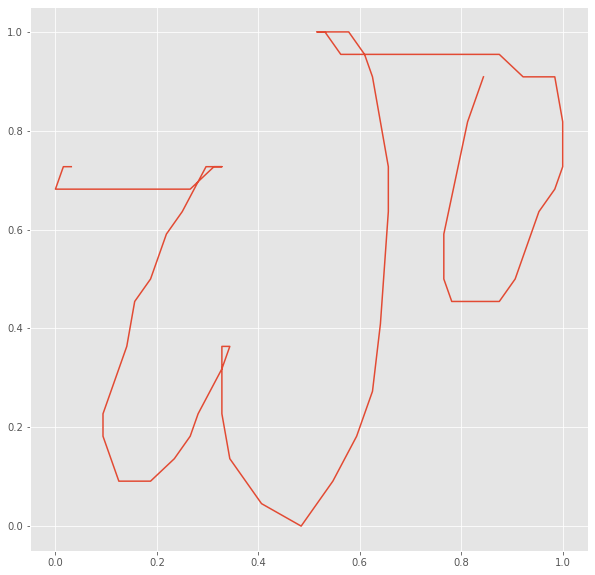

In [48]:
plt.plot(test[80][:,0],test[80][:,1])


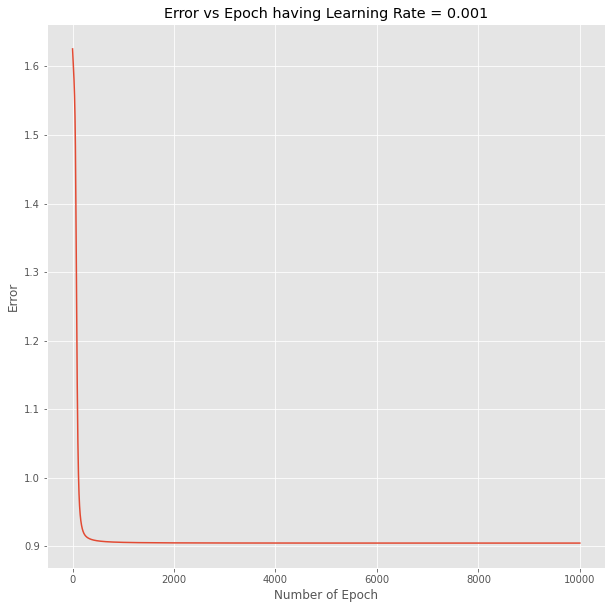

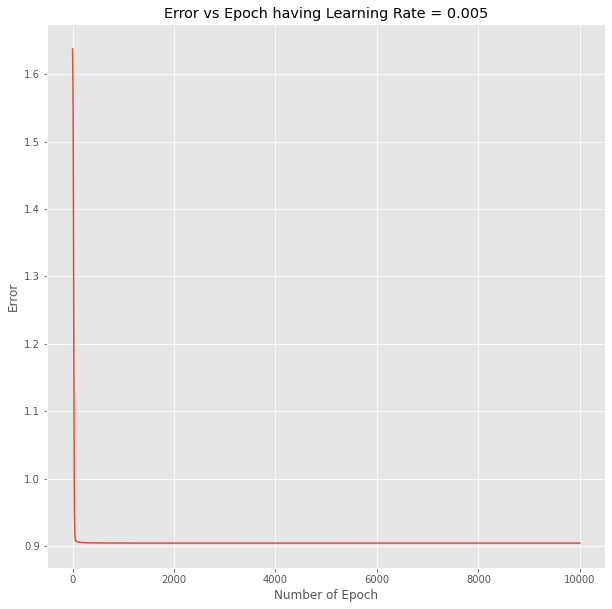

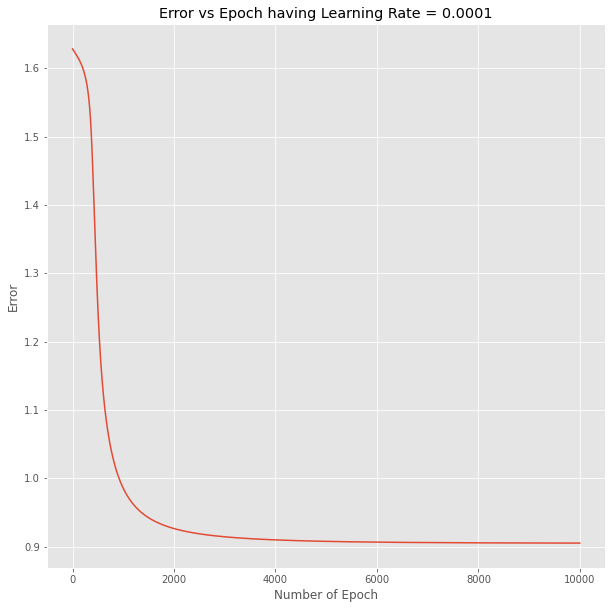

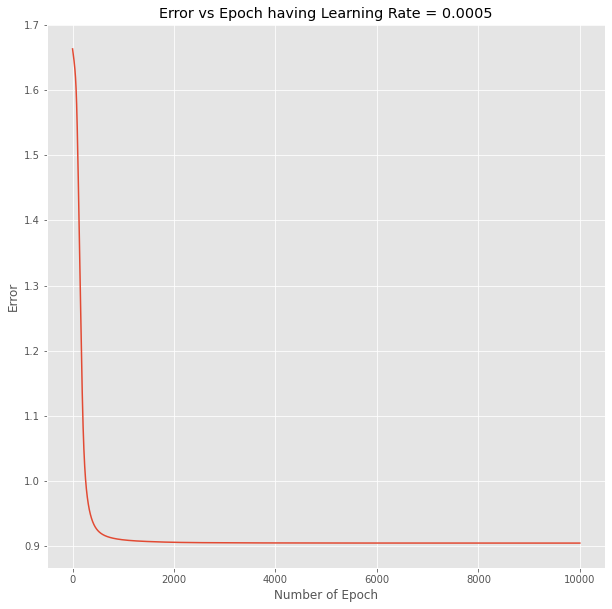

In [92]:
criterion = nn.CrossEntropyLoss()
learning_rates = [ 0.001, 0.005, 0.0001,0.0005]

for pos in range(len(learning_rates)):
  rnn_rnn = LSTM_Char(input_size, hidden_size, layer_size, output_size)
  optimizer = optim.Adam(rnn_rnn.parameters(), lr=learning_rates[pos])
  losss =[]
  epoch = 10000
  preloss=0
  
  for j in range(epoch):
    test_loss=0
    for i in range(len(test)):

      A = test[i]
      A = A.astype(np.float32)
      input =torch.from_numpy(A)
      l = label[i]
      l = l.astype(np.float32)
      l=np.argmax(l)
      lbl  =torch.tensor(l)
      optimizer.zero_grad()
      output=rnn_rnn(input)
      
      # print(output)
      # print(lbl)

      loss = criterion(input=output, target =lbl)
      loss.backward()
      # Updates the weights
      optimizer.step()
      
      # Save Loss & Accuracy after each iteration
      test_loss += loss.item()
      losss.append(test_loss)
      preloss = test_loss

      if abs(preloss-test_loss)<=10e-4:
        break
      
    # Print Average Train Loss & Accuracy after each epoch
    # print('test | Epoch: {}/{} | Loss: {:.2f} |'.format(j+1, epoch, train_loss))

  plt.plot(losss)
  plt.xlabel("Number of Epoch")
  plt.ylabel("Error")
  plt.title("Error vs Epoch having Learning Rate = {}".format(learning_rates[pos]))
  plt.show()
  #LSTM_accuracy_confusion_matrix()


In [51]:
test_loss=0

confusion_matrix = np.zeros((5,5))
# print(confusion_matrix)
epoch =10
for i in range(len(label)-1):

  A = test[i]
  A = A.astype(np.float32)
  input =torch.from_numpy(A)
  l = label[i]
  l = l.astype(np.float32)
  l=np.argmax(l)
  lbl  =torch.tensor(l)
  optimizer.zero_grad()
  output=rnn_rnn(input)
  pre = torch.argmax(output).item()
  act = lbl.item()
  
  if pre == act :
    confusion_matrix[act][act]+=1
  else:
    confusion_matrix[act][pre]+=1

Acc = confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2]+confusion_matrix[3][3]+confusion_matrix[4][4]
Total = np.sum(confusion_matrix)
Acc = 100* Acc/Total
print('Accuracy: ',Acc)
print(confusion_matrix)



Accuracy:  59.5959595959596
[[20.  0.  0.  0.  0.]
 [ 0.  0. 19.  1.  0.]
 [ 0.  0. 19.  0.  0.]
 [ 0.  0.  0. 20.  0.]
 [ 0.  0. 19.  1.  0.]]
